# Наивен Бејесов алгоритам

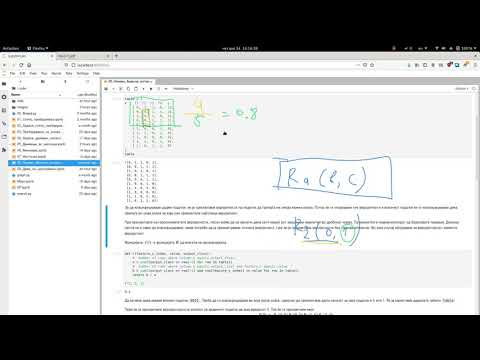

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('l3o_Y5f4UnM')

## Референци
- [Упатство за инсталирање на потребните библиотеки и екстензии](https://docs.google.com/presentation/d/1tnoeNF_ge9KK_ovTF7xgKVB64ltuV27IPShk3ddSK5w/edit#slide=id.ga20dadbc8e_0_0)
- [Објаснување за Наивен Бејесов алгоритам - Џош Страмер](https://www.youtube.com/watch?v=O2L2Uv9pdDA)
- [За Бејесовата теорема - Дерек Милер](https://www.youtube.com/watch?v=R13BD8qKeTg)
- [За Бејесовата теорема - Грант Сандерсон](https://www.youtube.com/watch?v=HZGCoVF3YvM)


Бејесов класификатор е алгоритам за класификација кој на некој начин ја користи [Бејесовата теорема](https://en.wikipedia.org/wiki/Bayes%27_theorem) за да класифицира. Наивен Бејесов класификатор е Бејесов класификатор кој моделира независност помеѓу признаците (карактеристиките) во податочното множество. Објаснување за алгоритамот ќе најдете во книгата на професорката, а следува код кој ја имплементира функцијата од книгата.

Нека е дадена табела `table`. Последната колона `y` е излезна колона, а сите други `f` колони се признаци.

In [3]:
table = [
#    f1  f2  f3  f4   y
    [ 0,  1,  1,  0,  1],
    [ 0,  0,  1,  1,  1],
    [ 1,  0,  1,  0,  1],
    [ 0,  0,  1,  1,  1],
    [ 0,  0,  0,  1,  1],
    [ 1,  0,  0,  1,  0],
    [ 1,  1,  0,  1,  0],
    [ 1,  0,  0,  0,  0],
    [ 1,  1,  0,  1,  0],
    [ 1,  0,  1,  1,  0]
]
table

[[0, 1, 1, 0, 1],
 [0, 0, 1, 1, 1],
 [1, 0, 1, 0, 1],
 [0, 0, 1, 1, 1],
 [0, 0, 0, 1, 1],
 [1, 0, 0, 1, 0],
 [1, 1, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [1, 1, 0, 1, 0],
 [1, 0, 1, 1, 0]]

За да класифицираме даден податок, ќе ја пресметаме веројатноста тој податок да припаѓа на секоја можна класа. Потоа ќе ги споредиме тие веројатности и влезниот податок ќе го класифицираме дека припаѓа во онаа класа за која сме пресметале најголема веројатност.

При пресметката на гореспоменатите веројатности, лесно може да се заклучи дека сите имаат ист заеднички именител во дробниот израз. Тој именител е нормализаторот од Бејесовата теорема. Доколку целта ни е само да класифицираме, нема потреба да ја пресметуваме точната веројатност, туку ќе ја пресметаме веројатноста без тој нормализатор. Во овој случај зборуваме за веродостојност наместо веројатност.

Функцијата `r()` е функцијата $R$ од книгата на професорката.

In [4]:
def r(feature_x_index, value, output_class):
    #  number of rows where column y equals output_class
    a = sum([output_class == row[-1] for row in table])
    #  number of rows where column y equals output_class and feature_x equals value
    b = sum([output_class == row[-1] and row[feature_x_index-1] == value for row in table])
    return b / a

r(2, 0, 1)

0.8

Да речеме дека имаме влезен податок `0011`. Треба да го класифицираме во која група спаѓа, односно да пресметаме дали излезот за овој податок е 0 или 1. Ќе ја користиме дадената табела `table`.

Прво ќе ја пресметаме веродостојноста излезот за дадениот податок да има вредност 0. Тоа ќе го пресметаме како $$ S(0) = R_1(0, 0) R_2(0, 0) R_3(1, 0) R_4(1, 0) $$
каде $R_a(b, c)$ ја пресметува застапеноста на податоците каде излез е `c`, а признакот `f_a` има вредност `b`, во податоците каде излез е `c`. На овој начин секоја вредност ја пресметуваме статистички. Преку код ова ќе го запишеме како `r(a, b, c)`.

In [3]:
s_0 = r(1, 0, 0) * r(2, 0, 0) * r(3, 1, 0) * r(4, 1, 0)
s_0

0.0

Потоа ќе ја пресметаме веродостојноста излезот за дадениот податок да има вредност 1. Тоа ќе го пресметаме како $$ S(1) = R_1(0, 1) R_2(0, 1) R_3(1, 1) R_4(1, 1) $$.

$S(1) > S(0)$, па заклучуваме дека излезот за дадениот податок е 1. 

In [4]:
s_1 = r(1, 0, 1) * r(2, 0, 1) * r(3, 1, 1) * r(4, 1, 1)
s_1

0.3072000000000001

## Задача за самостојна работа

Воведете лапласова корекција за да ги избегнеме случаите кога во нашето податочно множество немаме податок дека се случил некој настан кој може да се случи, односно некоја вредност $R_a(b, c) = 0$, како што е дадено во примерот погоре.

In [5]:
def r(feature_x_index, value, output_class):
    #  number of rows where column y equals output_class
    a = sum([output_class == row[-1] for row in table])
    #  number of rows where column y equals output_class and feature_x equals value
    b = sum([output_class == row[-1] and row[feature_x_index-1] == value for row in table])
    return (b + 1) / (a + 2)

r(2, 0, 1)

0.7142857142857143

In [6]:
s_0 = r(1, 0, 0) * r(2, 0, 0) * r(3, 1, 0) * r(4, 1, 0)
s_0

0.016659725114535607

In [ ]:
Веројатноста е сепак многу мала.

## Наивен Бејесов алгоритам преку библиотеката `scikit-learn`

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [37]:
data = open('data/vesti.txt', encoding='utf-8').read().lower().split('\n')
print(data)
titles = [d.lstrip('naslov:').strip() for d in data if d.startswith('naslov')]
text_bodies = [d.lstrip('tekst:').strip() for d in data if d.startswith('tekst')]
classes = [d.lstrip('klasa:').strip() for d in data if d.startswith('klasa')]

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [38]:
texts = []
for title, text_body in zip(titles, text_bodies):
    texts.append(''.join(bukva for bukva in title + text_body if bukva in 'абвгдѓежзѕијклљмнњопрстќуфхцчџш '))


In [39]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(texts, classes, test_size=0.25, random_state=161)

In [40]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha=1e-3)),
])

In [41]:
clf.fit(train_dataset, train_labels)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vectorizer', ...), ('tfidf', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (strip_accents and lowercase) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [42]:
y_pred = clf.predict(test_dataset)

In [43]:
y_pred_train = clf.predict(train_dataset)

In [44]:
print('Accuracy Score on train data: ', accuracy_score(y_true=train_labels, y_pred=y_pred_train))
print('Accuracy Score on test data: ', accuracy_score(y_true=test_labels, y_pred=y_pred))

Accuracy Score on train data:  0.9987484355444305
Accuracy Score on test data:  0.9536921151439299


In [45]:
for true, pred in zip(test_labels, y_pred):
    if true != pred:
        print(true, pred)

makedonija svet
svet makedonija
makedonija kultura
makedonija svet
svet kultura
sport svet
makedonija kultura
makedonija svet
sport makedonija
kultura makedonija
makedonija kultura
makedonija svet
sport kultura
makedonija kultura
svet makedonija
svet makedonija
kultura makedonija
sport makedonija
svet kultura
kultura makedonija
makedonija svet
kultura makedonija
sport svet
svet makedonija
kultura makedonija
svet makedonija
sport svet
kultura makedonija
makedonija svet
sport kultura
svet makedonija
kultura svet
kultura makedonija
sport svet
makedonija kultura
sport kultura
kultura makedonija
